## Declaração de bibliotecas e demais configurações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from sklearn import svm
import matplotlib.gridspec as gridspec

## Funções relacionadas ao método ou auxiliares

In [2]:
#Função de leitura dos dados------------------------------------
def read_class_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            try:
                data = np.vstack( (data , np.asarray(row).astype(np.float) ) )
            except:
                data = np.asarray(row).astype(np.float)
    f.close()
    y = data[:,0]
    x = data[:,1:]
    return y,x

## Leitura dos dados
* Fazemos aqui a leitura dos dados obtidos externamente...
* O software ENVI foi usado para coletar os dados
* $\texttt{path_D}$ corresponde aos dados de treinamento
* $\texttt{path_I}$ corresponde aos dados usados para avaliação do método

---

* Diferente dos exemplos anteriores, os dados possuem duas componentes adicionais: latitude e longitude da informação
* Estas informações não devem ser incluídas no processo de treinamento, classificação e avaliação
* Serão utilizadas somente na construção de representações espaciais! ;)

In [3]:
#Dados de treinamento
path_D = 'dados_treino_geoloc_2class.txt'

#Dados de avaliação
path_V = 'dados_avaliacao_geoloc_2class.txt'

#Dados a serem classifcados
path_I = 'area_classificacao.txt'

#Leitura dos dados
yD,xD_g = read_class_data(path_D)
yV,xV_g = read_class_data(path_V)
yI,xI_g = read_class_data(path_I) #note que yI não tem muita funcionalidade aqui (será sobrescrito lobo abaixo)

#remoção da lat/long de xD e xI (usada apenas para garação dos gráficos)
xD = np.copy(xD_g[:,2:]) #copia o conteúdo, de todas as linhas, da 3a até a última coluna
xV = np.copy(xV_g[:,2:]) 
xI = np.copy(xI_g[:,2:])

## Treinamento do método
* $\texttt{g}$ é uma instanciação gerada via svm.SVC
* $C=100$ e $\texttt{kernel='linear'}$ são parâmetros do método
* $\texttt{decision_function_shape='ovr'}$ determina o uso da estratégia 'ovr'
* O Treinamento é efetuado pelo método 'fit'

In [4]:
#Parametrização e treinamento do SVM--------------------------------------
gx = svm.SVC(C=100,kernel='linear',decision_function_shape='ovr')
gx.fit(xD,yD)

SVC(C=100, kernel='linear')

## Avaliação do treinamento

In [6]:
#Fase de avaliação--------------------------------------------------------
yEst = np.copy(yV)
for i in range(0, yV.size):
    padrao = [ xV[i,:] ]       #Compatibilizar com função 'predict'
    yEst[i] = gx.predict(padrao)

acerto = np.count_nonzero( yV == yEst ) / yV.size
print("Acerto: %f "%(acerto))

Acerto: 0.998314 


## Classificação dos dados

In [6]:
#Classificação de cada padrão vindo de 'path_I'---------------------------
for i in range(0, yI.size):
    padrao = [ xI[i,:] ]       #Compatibilizar com função 'predict'
    yI[i] = gx.predict(padrao)

## Geração da representação espacial

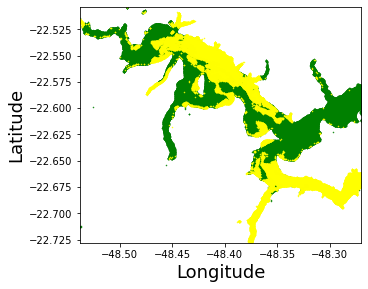

In [8]:
#Posição da predição de cada classe em yI
cla1Pos = np.where(yI == 1)
cla2Pos = np.where(yI == 2)
cla3Pos = np.where(yI == 3)

#Construção do gráfico com os resultados do processo----------------------

#Variação de latitude e longitude na área de estudo
mapVarLat = np.ceil( np.max(xD_g[:,0]) - np.min(xD_g[:,0]) )
mapVarLon = np.ceil( np.max(xD_g[:,1]) - np.min(xD_g[:,1]) )

#Tamanho da figura a ser gerada -- proporcinal à área de estudo
FS = ( 5*(mapVarLon/mapVarLat),5*(mapVarLat/mapVarLon))

#Ajustes da componente que compõe a figura
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
ax = fig.add_subplot(spec[0, 0])

#Construção do gráfico-----------------------------------------
if np.size(cla1Pos) > 1:
    ax.plot( xI_g[cla1Pos, 1], xI_g[cla1Pos, 0], '.', color='green', markersize=1)
    
if np.size(cla2Pos) > 1:
    ax.plot( xI_g[cla2Pos, 1], xI_g[cla2Pos, 0], '.', color='yellow', markersize=1)

if np.size(cla3Pos) > 1:
    ax.plot( xI_g[cla3Pos, 1], xI_g[cla3Pos, 0], '.', color='blue', markersize=1)

ax.set_xlabel('Longitude', fontsize=18)
ax.set_ylabel('Latitude', fontsize=18)
ax.set( xlim=(np.min(xI_g[:,1]), np.max(xI_g[:,1])), ylim=(np.min(xI_g[:,0]), np.max(xI_g[:,0])) )
ax.set_aspect('equal')

plt.show()